In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

**Import python packages**

In [3]:
import os
import shutil

from tqdm import tqdm

import numpy as np
import pandas as pd
import tensorflow as tf

import librosa
import librosa.display

import matplotlib
#matplotlib.use('Agg')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

from audiovocana.preprocessing import get_dataframe

In [4]:
#plt.style.use('ggplot')
MARKER = '.'
MARKERSIZE = 4
LINESTYLE ='-'
FONTSIZE = 12
FIGSIZE = (8, 4)

In [10]:
df = get_dataframe(csv_path='/home/utilisateur/Desktop/palomars/data/full/dataset.csv')
df = df.assign(duration_ms=1000 * df.duration)
print(df.columns)
print(df.dtypes)

Reading csv from /home/utilisateur/Desktop/palomars/data/full/dataset.csv.
Found 4217 events from 46 different experiments and 132 different recordings
Index(['t0', 't1', 'duration', 'event', 'postnatalday', 'vocalization', 'nest',
       'year', 'audio_path', 'experiment', 'recording', 'duration_ms'],
      dtype='object')
t0              float64
t1              float64
duration        float64
event             int64
postnatalday      int64
vocalization      int64
nest              int64
year              int64
audio_path       object
experiment       object
recording         int64
duration_ms     float64
dtype: object


**Compute dataset**

Should be fast if dataset already memoized.

In [17]:
df["duration_ms"].mean()

49.337989091772414

In [19]:
df["duration_ms"].median()

33.80000000004202

In [18]:
df.groupby("year")["duration_ms"].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
17,2229.0,45.902871,43.750384,-0.5,14.8,29.8,62.0,259.5
19,1988.0,53.189537,45.792977,-0.6,20.5,37.9,73.7,273.4


In [14]:
for c in ['postnatalday', 'vocalization', 'nest', 'year', 'experiment']:
    print(f"---- {c} ----")
    print(df[c].value_counts())

---- postnatalday ----
1     1792
9     1329
4      679
5      202
10     138
2       77
Name: postnatalday, dtype: int64
---- vocalization ----
2    1833
1    1429
3     955
Name: vocalization, dtype: int64
---- nest ----
3    1196
2    1064
4     797
1     625
5     535
Name: nest, dtype: int64
---- year ----
17    2229
19    1988
Name: year, dtype: int64
---- experiment ----
19N3EP9     467
17N1EP01    338
17N2EP01    282
19N2UP1     252
19N5EP9     152
17N2EP09    141
19N5UP9     125
17N3UP05    121
17N1UP01    119
17N4EP01    110
17N2UP01    106
19N3EP1     100
19N4EP4     100
17N3EP01     98
17N3UP01     97
17N4UP10     83
19N4EP1      82
17N4EP05     81
19N5UP1      78
19N5EP2      77
19N4EP9      73
17N3EP09     72
17N2UP04     71
17N4EP09     68
17N2EP04     63
19N5EP4      57
17N1EP04     52
19N3EP4      51
17N3UP09     51
19N2UP4      49
17N3EP04     46
19N5UP4      46
19N4UP1      45
17N1UP04     45
17N4UP01     44
17N1EP09     43
17N4UP04     43
19N3UP1      41
19N2EP9    

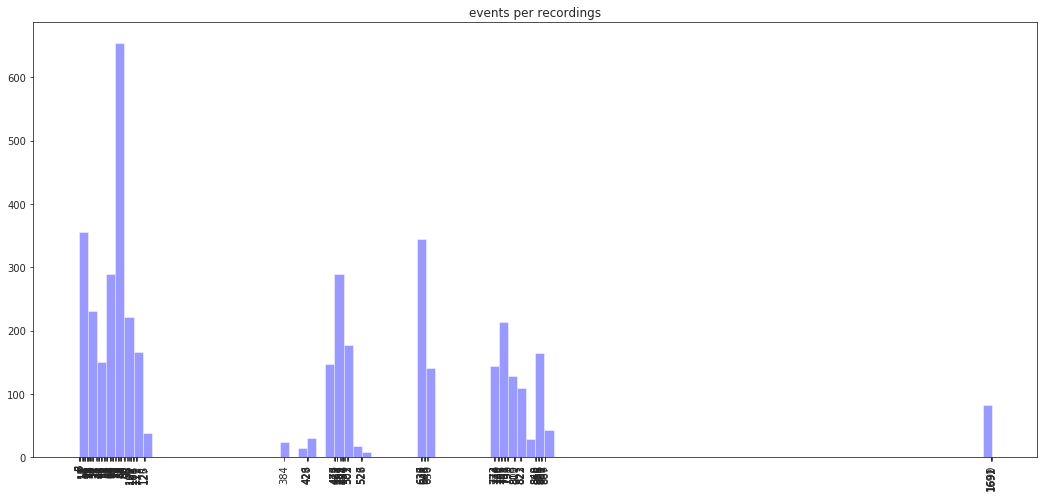

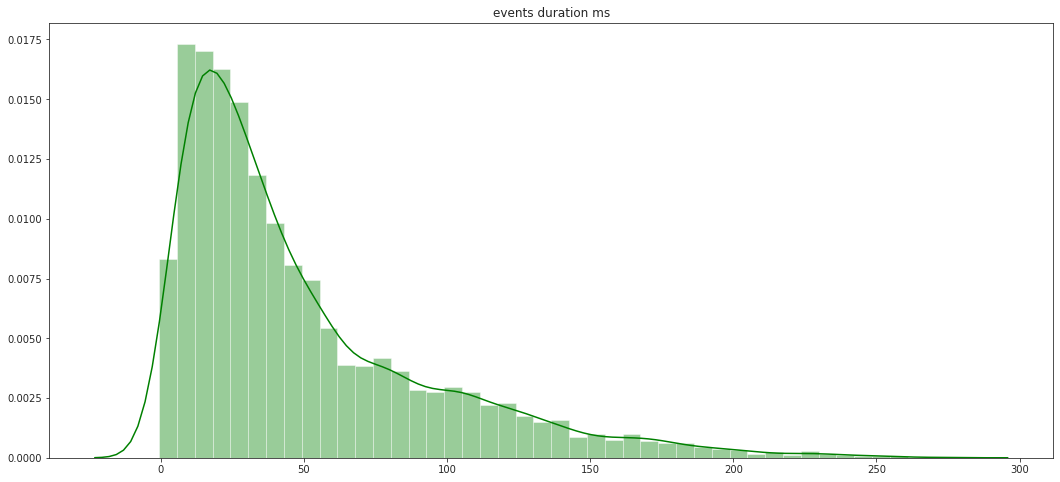

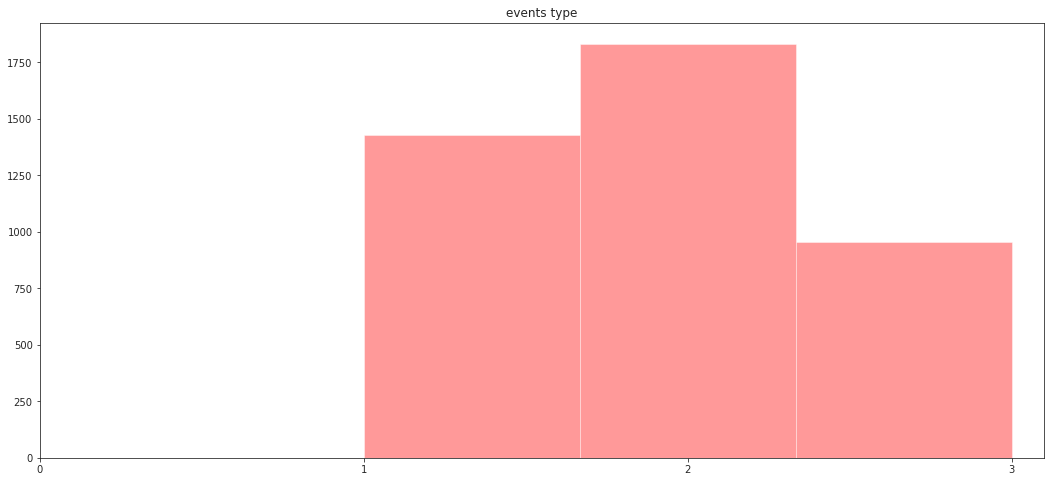

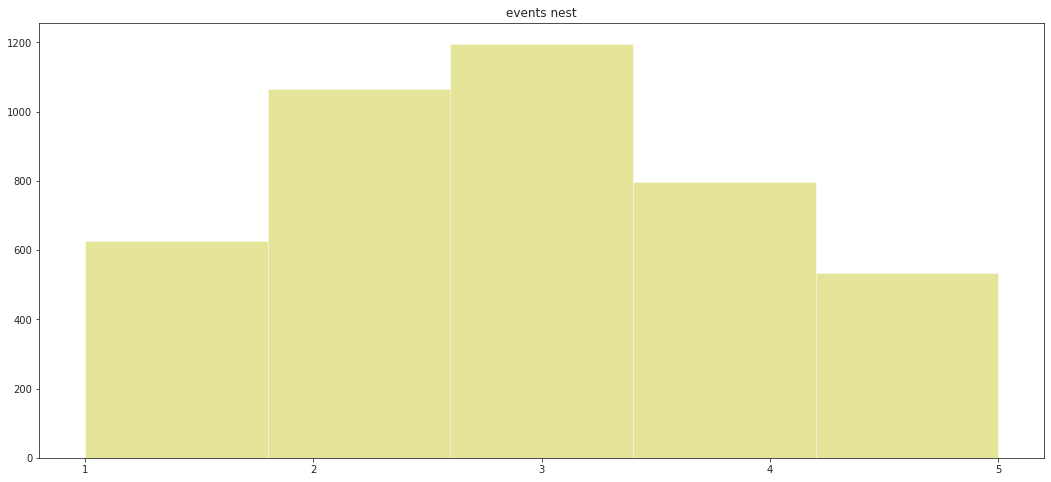

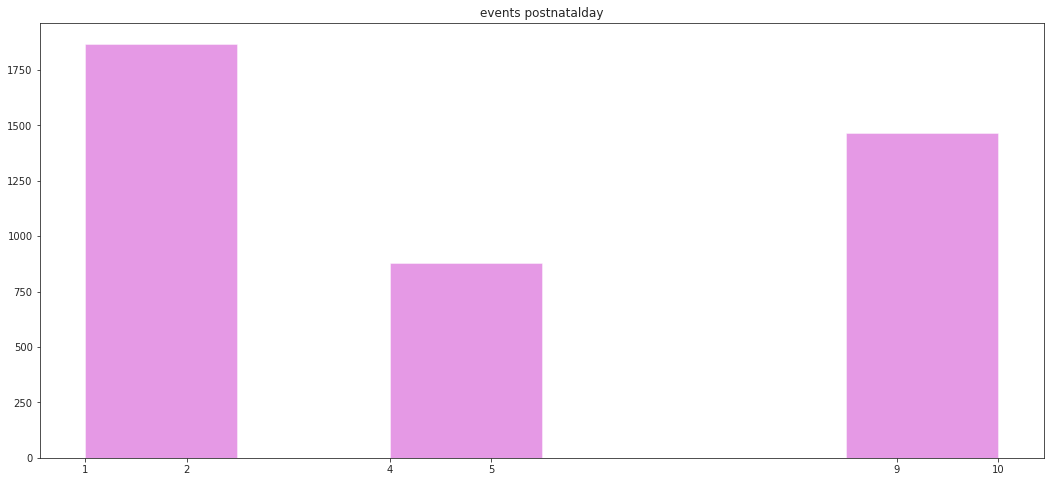

In [16]:
df = df.astype({"recording": int, "vocalization": int, "nest": int, "postnatalday": int})

f, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.distplot(df[['recording']], bins=100, kde=False, color="b", ax=ax)
plt.title('events per recordings')
ax.set_xticks(df.recording.unique())
plt.xticks(rotation=90)


f, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.distplot(df[['duration_ms']], kde=True, color="g", ax=ax)
plt.title('events duration ms')

f, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.distplot(df[['vocalization']], bins=3, kde=False, color="r", ax=ax)
plt.title('events type')
ax.set_xticks([0, 1 , 2, 3])

f, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.distplot(df[['nest']], bins=df.nest.nunique(), kde=False, color="y", ax=ax)
plt.title('events nest')
ax.set_xticks(df.nest.unique())

f, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.distplot(df[['postnatalday']], bins=df.postnatalday.nunique(), kde=False, color="m", ax=ax)
plt.title('events postnatalday')
ax.set_xticks(df.postnatalday.unique())

#df.columns

**Save plots**

**save stft**

**save mel spectrogram**

**save mfcc**